In [1]:
##### Import all necessity functions for Machine Learning #####
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
import zipfile
import cv2
import os
import re
import nltk
import random
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
from functools import reduce
from itertools import chain
from wordcloud import WordCloud
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

##### Download keras #####
!pip install keras

##### Remove all warnings #####
import warnings
warnings.filterwarnings("ignore")

##### Import all necessity functions for Neural Network #####
import tensorflow as tf
from keras.models import Sequential, Model
from keras.utils import plot_model
from keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU,  Embedding
from keras.activations import tanh, relu, sigmoid, softmax, swish
from keras.regularizers import L1, L2, L1L2
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber, BinaryCrossentropy
import keras.utils as image
from google.colab.patches import cv2_imshow
from keras.utils import plot_model

##### Plotting the confusion matrix #####
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

###### NLP Libraries ######

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

###### Download functions for nltk ######

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

#####Import the dataset

In [104]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#####Convert this target class into Numerical

In [105]:
df.loc[:, 'Species'] = df.loc[:, 'Species'].\
      map({value: index for index, value\
      in enumerate(df.loc[:, 'Species'].value_counts().index)})

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


#####Scaling the dataset

In [107]:
StandardScaler = MinMaxScaler()
independent = StandardScaler.fit_transform(df.iloc[:, :-1].values)
independent = pd.DataFrame(independent, columns = df.columns[:-1])
df = pd.concat([independent, df.iloc[:, -1]], axis = 1)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.000000,0.222222,0.625000,0.067797,0.041667,0
1,0.006711,0.166667,0.416667,0.067797,0.041667,0
2,0.013423,0.111111,0.500000,0.050847,0.041667,0
3,0.020134,0.083333,0.458333,0.084746,0.041667,0
4,0.026846,0.194444,0.666667,0.067797,0.041667,0


#####Drop the Id column

In [108]:
try:
  df.drop(['Id'], axis = 1, inplace = True)
except Exception as e:
  print(e.with_traceback)
else:
  print("Id column is deleted !!!")

Id column is deleted !!!


#####Split the dataset with train and test

In [109]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

print("The shape of X_train is # {} ".format(X_train.shape),'\n')
print("The shape of X_test  is # {} ".format(X_test .shape),'\n')
print("The shape of y_train is # {} ".format(y_train.shape),'\n')
print("The shape of y_test  is # {} ".format(y_test.shape))

The shape of X_train is # (112, 4)  

The shape of X_test  is # (38, 4)  

The shape of y_train is # (112,)  

The shape of y_test  is # (38,) 


#####Initiate the DataLoader with batch_size :: 16

In [110]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader

""""Convert X_train and X_test into torch Float"""
X_train = torch.tensor(data = X_train, dtype = torch.float32)
X_test  = torch.tensor(data = X_test, dtype = torch.float32)

"""Initiate the DataLoader"""
loader = DataLoader(dataset = list(zip(X_train, y_train)), batch_size = 32, shuffle = True)
print("The batch size of this loader # {} ".format(loader.batch_size))

The batch size of this loader # 32 


In [111]:
data, labels = next(iter(loader))
print("The shape of singular batch size of training data # {} ".format(data.shape))
print("The shape of singular batch size of label data # {} ".format(labels.shape))

The shape of singular batch size of training data # torch.Size([32, 4]) 
The shape of singular batch size of label data # torch.Size([32]) 


#####Initialize the loss function & optimizer

In [9]:
# LEARNING_RATE = 0.001
# loss_function = nn.CrossEntropyLoss()
# optimizer = optim.Adam(params = model.parameters(), lr = LEARNING_RATE)

#####Model Building using Sequential

In [112]:
"""
    Create a class named IrisClassifier that will take TWO parameters
    1. input_dimension  : This will determine how many features that I am going to train.
    2. output_dimension : This will determine how many output that I intend to
"""
class IrisClassifier(nn.Module):
  def __init__(self, input_dimension = None, output_dimension = None):
    # Call the super class that will inherit all the methods that would be needed
    super().__init__()
    """
        Create the First Layer
        1. in_features : that would be the input_dimension
        2. out_features: that would be the neurons that will be passed
        3. Activation  : ReLU
        4. weight init : he_normal
        5. Dropout rate: 0.5
    """
    self.FirstLayer = nn.Sequential(
        # Create the first hidden layer
        nn.Linear(in_features = input_dimension, out_features = 64),
        # Initialize the activation function
        nn.ReLU(),
        # Initialize the dropout ration with 0.3
        nn.Dropout(p = 0.5)
    )

    """
        Create the Second Layer
        1. in_features : that would be the input_dimension
        2. out_features: that would be the neurons that will be passed
        3. Activation  : ReLU
        4. weight init : he_normal
        5. Dropout rate: 0.6
    """
    self.SecondLayer = nn.Sequential(
        # Create the first hidden layer
        nn.Linear(in_features = 64, out_features = 32),
        # Initialize the activation function
        nn.ReLU(),
        # Initialize the dropout ration with 0.3
        nn.Dropout(p = 0.3)
    )

    """
        Create the Output Layer
        1. in_features : that would be the input_dimension
        2. out_features: that would be the neurons that will be passed
        3. Activation  : Softmax
        4. weight init : glorot_uniform
    """
    self.OutputLayer = nn.Sequential(
        # Create the first hidden layer
        nn.Linear(in_features = 32, out_features = output_dimension),
        # Initialize the activation function
        nn.Softmax()
    )

  def forward(self, x):
    # For the First Layer
    x = self.FirstLayer(x)

    # For the Second Layer
    x = self.SecondLayer(x)

    # For the Output Layer
    x = self.OutputLayer(x)

    return x

In [113]:
# Call the IrisClassifier model
try:
  model = IrisClassifier(input_dimension = X_train.shape[1], output_dimension = len(np.unique(y_test)))
except Exception as e:
  print(e.with_traceback)
else:
  print(model.parameters)

<bound method Module.parameters of IrisClassifier(
  (FirstLayer): Sequential(
    (0): Linear(in_features=4, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (SecondLayer): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
  )
  (OutputLayer): Sequential(
    (0): Linear(in_features=32, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)>


In [114]:
# Display the model
summary(model = model, input_size = X_train.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 112, 64]             320
              ReLU-2              [-1, 112, 64]               0
           Dropout-3              [-1, 112, 64]               0
            Linear-4              [-1, 112, 32]           2,080
              ReLU-5              [-1, 112, 32]               0
           Dropout-6              [-1, 112, 32]               0
            Linear-7               [-1, 112, 3]              99
           Softmax-8               [-1, 112, 3]               0
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.25
Params size (MB): 0.01
Estimated Total Size (MB): 0.26
----------------------------------------------------------------


In [115]:
LEARNING_RATE = 0.001
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(params = model.parameters(), lr = LEARNING_RATE)

In [14]:
optimizer, loss_function

(Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     weight_decay: 0
 ),
 CrossEntropyLoss())

In [15]:
next(iter(model.parameters()))

Parameter containing:
tensor([[ 1.1119e-01, -2.2360e-01, -2.6871e-01, -4.3155e-01],
        [ 3.0054e-01, -6.8391e-02, -1.1406e-01, -3.0228e-01],
        [ 2.9313e-01,  7.4418e-02,  2.2712e-01, -2.2702e-02],
        [-2.7872e-01, -1.9846e-01,  1.3162e-01, -4.4740e-01],
        [-3.8464e-01, -4.1158e-01, -2.5359e-01, -4.0390e-01],
        [-3.2683e-01,  2.7889e-01,  2.8375e-01, -4.7672e-01],
        [ 2.5954e-01,  4.9520e-01, -1.2633e-01, -3.1156e-01],
        [-3.0120e-02, -1.6747e-03, -3.7768e-01, -1.4174e-01],
        [ 2.6731e-01,  2.2227e-01,  5.5507e-02, -3.2318e-01],
        [-4.3340e-01, -4.2422e-01,  2.4346e-01,  3.1645e-01],
        [ 4.8067e-01, -4.2725e-02, -8.2364e-02,  3.1021e-01],
        [-2.8673e-01,  2.4365e-01, -5.9954e-02,  2.6524e-01],
        [-1.2120e-02, -4.9837e-01,  4.5313e-01,  1.3565e-01],
        [ 3.5008e-01, -2.7329e-01,  2.5984e-01,  4.7131e-01],
        [-2.4392e-02, -2.7519e-01,  1.3997e-01, -3.6168e-01],
        [-3.2224e-01,  2.4009e-01, -2.6331e-01, 

In [16]:
model.state_dict()

OrderedDict([('FirstLayer.0.weight',
              tensor([[ 1.1119e-01, -2.2360e-01, -2.6871e-01, -4.3155e-01],
                      [ 3.0054e-01, -6.8391e-02, -1.1406e-01, -3.0228e-01],
                      [ 2.9313e-01,  7.4418e-02,  2.2712e-01, -2.2702e-02],
                      [-2.7872e-01, -1.9846e-01,  1.3162e-01, -4.4740e-01],
                      [-3.8464e-01, -4.1158e-01, -2.5359e-01, -4.0390e-01],
                      [-3.2683e-01,  2.7889e-01,  2.8375e-01, -4.7672e-01],
                      [ 2.5954e-01,  4.9520e-01, -1.2633e-01, -3.1156e-01],
                      [-3.0120e-02, -1.6747e-03, -3.7768e-01, -1.4174e-01],
                      [ 2.6731e-01,  2.2227e-01,  5.5507e-02, -3.2318e-01],
                      [-4.3340e-01, -4.2422e-01,  2.4346e-01,  3.1645e-01],
                      [ 4.8067e-01, -4.2725e-02, -8.2364e-02,  3.1021e-01],
                      [-2.8673e-01,  2.4365e-01, -5.9954e-02,  2.6524e-01],
                      [-1.2120e-02, -4.9837e-01,  4

#####Do the training

In [116]:
BATCH_SIZE = 16
train_loader = DataLoader(dataset = list(zip(X_train, y_train)), batch_size = BATCH_SIZE, shuffle = True)
test_loader  = DataLoader(dataset = list(zip(X_test, y_test)), batch_size = BATCH_SIZE, shuffle = True)

In [18]:
EPOCHS = 100
history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}
TRAIN_LOSS = []
VAL_LOSS   = []
TRAIN_ACCURACY = []
VAL_ACCURACY   = []

########################
#       Training       #
########################

# train the model
model.train()
# Run a loop with respect to defined Epoch
for epoch in range(EPOCHS):
  """
      1. Extract the data(X_batch), label(y_batch) from the `train_loader`
      2. Pass X_batch as a training data into the model and do the prediction
      3. Compute the Loss Function
      4. Store computed loss into TRAIN_LOSS
  """
  for (X_batch, y_batch) in train_loader:
    # Do the prediction
    train_prediction = model(X_batch)
    # Compute the loss with the predicted and orginal
    train_loss = loss_function(train_prediction, y_batch)
    """
        1. Initiate the Optimizer
        2. Do the backward propagation with respect to train_loss
        3. Do the step with optimizer
    """
    # Initialize the optimizer
    optimizer.zero_grad()
    # Do back propagation
    train_loss.backward()
    # Do the step with respect to optimizer
    optimizer.step()

  ########################
  # Compute the Accuracy #
  ########################

  # Do the prediction of training
  train_predicted = torch.argmax(train_prediction, dim = 1)
  # Append the train accuracy
  TRAIN_ACCURACY.append(accuracy_score(train_predicted, y_batch))
  # Append the train loss
  history['accuracy'].append(accuracy_score(train_predicted, y_batch))
  with torch.no_grad():
    # Append the train loss
    TRAIN_LOSS.append(train_loss.item())
    # Append the train loss into the history
    history['loss'].append(train_loss.item())

  ########################
  #       Testing        #
  ########################

  """
      1. Extract the data(val_batch), label(val_batch) from the `test_loader`
      2. Pass val_batch as a training data into the model and do the prediction
      3. Compute the Loss Function
      4. Store computed loss into VAL_LOSS & VAL_ACCURACY
  """
  # Run a loop with respect to test_loader
  for (val_data, val_label) in test_loader:
    # Do the prediction
    test_prediction = model(val_data)
    # Compute the loss
    test_loss = loss_function(test_prediction, val_label)

  ##########################
  #  Compute the Accuracy  #
  ##########################

  # Append the test loss
  with torch.no_grad():
    VAL_LOSS.append(test_loss.item())
    history['val_loss'].append(test_loss.item())
    # Compute the accuracy
    test_predicted = torch.argmax(test_prediction, dim = 1)
    # Append the accuracy of testing data
    VAL_ACCURACY.append(accuracy_score(test_predicted, val_label))
    history['val_accuracy'].append(accuracy_score(test_predicted, val_label))

  #########################
  #        Display        #
  #########################

  print("Epoch {}/{} ".format(epoch + 1, EPOCHS))
  print("{}/{} [=========================] loss: {} - accuracy: {} - val_loss: {} - val_accuracy: {} ".format(train_loader.batch_size,\
                                                                                                              train_loader.batch_size,\
                                                                                                              np.array(train_loss.item()).mean(),
                                                                                                              accuracy_score(train_predicted, y_batch),\
                                                                                                              np.array(test_loss.item()).mean(),\
                                                                                                              accuracy_score(test_predicted, val_label)))

Epoch 1/100 
16/16 [=========================] loss: 0.9815458655357361 - accuracy: 0.6875 - val_loss: 0.8868143558502197 - val_accuracy: 1.0 
Epoch 2/100 
16/16 [=========================] loss: 0.8720422983169556 - accuracy: 0.625 - val_loss: 0.8551578521728516 - val_accuracy: 0.6666666666666666 
Epoch 3/100 
16/16 [=========================] loss: 0.806363582611084 - accuracy: 0.8125 - val_loss: 0.6736342310905457 - val_accuracy: 0.8333333333333334 
Epoch 4/100 
16/16 [=========================] loss: 0.6296707987785339 - accuracy: 0.9375 - val_loss: 0.5743823051452637 - val_accuracy: 1.0 
Epoch 5/100 
16/16 [=========================] loss: 0.8622427582740784 - accuracy: 0.625 - val_loss: 0.5984918475151062 - val_accuracy: 1.0 
Epoch 6/100 
16/16 [=========================] loss: 0.7086951732635498 - accuracy: 0.875 - val_loss: 0.6653208136558533 - val_accuracy: 0.8333333333333334 
Epoch 7/100 
16/16 [=========================] loss: 0.6495131850242615 - accuracy: 0.875 - val_loss:

#####Do the evaluation

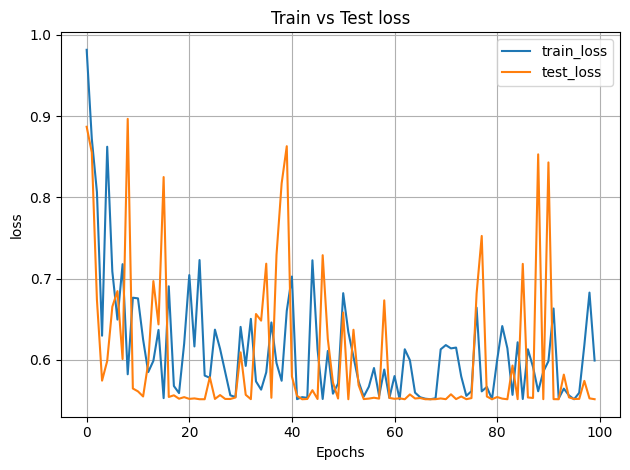

In [19]:
plt.title('Train vs Test loss')
plt.plot(history['loss'], label = 'train_loss')
plt.plot(history['val_loss'], label = 'test_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.tight_layout()
plt.grid(True)
plt.show()

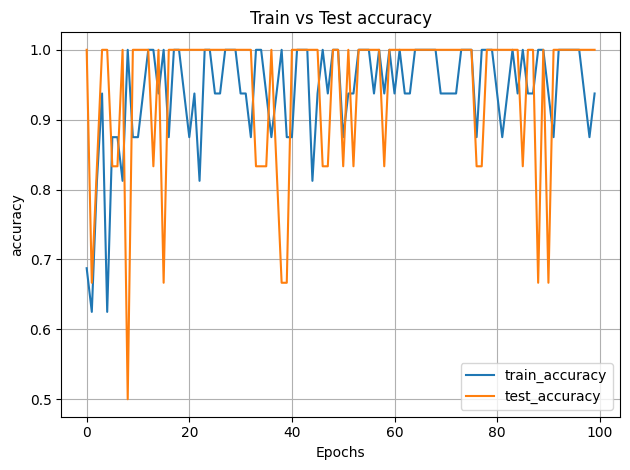

In [20]:
plt.title('Train vs Test accuracy')
plt.plot(history['accuracy'], label = 'train_accuracy')
plt.plot(history['val_accuracy'], label = 'test_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.tight_layout()
plt.grid(True)
plt.show()

In [21]:
predicted = model(X_test)
predicted = torch.argmax(predicted, dim = 1)
print("ACCURACY  # {} ".format(accuracy_score(predicted, y_test)),'\n')
print("PRECISION # {} ".format(precision_score(predicted, y_test, average = 'micro')),'\n')
print("RECALL    # {} ".format(recall_score(predicted, y_test, average = 'micro')),'\n')
print("F1_SCORE  # {} ".format(f1_score(predicted, y_test, average = 'micro')))

ACCURACY  # 0.9736842105263158  

PRECISION # 0.9736842105263158  

RECALL    # 0.9736842105263158  

F1_SCORE  # 0.9736842105263158 


#####In a different way

In [117]:
EPOCHS = 500
TRAIN_LOSS = []
VAL_LOSS = []
TRAIN_ACC = []
VAL_ACC = []
count = 0

for epoch in range(EPOCHS):
  TRAIN_LABELS      = []
  VAL_LABELS        = []
  TRAIN_PREDICTIONS = []
  VAL_PREDICTIONS   = []
  TOTAL_TRAIN_LOSS  = []
  TOTAL_VAL_LOSS    = []

  for (X_batch, y_batch) in train_loader:
    train_prediction = model(X_batch)
    train_loss = loss_function(train_prediction, y_batch)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    TOTAL_TRAIN_LOSS.append(train_loss.item())
    TRAIN_PREDICTIONS.extend(torch.argmax(train_prediction, dim = 1))
    TRAIN_LABELS.extend(y_batch)


  train_predicted = accuracy_score(TRAIN_PREDICTIONS, TRAIN_LABELS)
  TRAIN_ACC.append(train_predicted)
  TRAIN_LOSS.append(np.array(TOTAL_TRAIN_LOSS).mean())

  for (val_data, val_label) in test_loader:
    val_prediction = model(val_data)
    val_loss = loss_function(val_prediction, val_label)

    TOTAL_VAL_LOSS.append(val_loss.item())
    VAL_LABELS.extend(val_label)
    VAL_PREDICTIONS.extend(torch.argmax(val_prediction, dim = 1))

  val_predicted = accuracy_score(VAL_PREDICTIONS, VAL_LABELS)
  VAL_LOSS.append(np.array(TOTAL_VAL_LOSS).mean())
  VAL_ACC.append(val_predicted)
  ##Inside 112(Trainig data)/16(batch_size) = 7
  print("Epoch {}/{} ".format(epoch + 1, EPOCHS))
  print("{}/{} [======================] loss: {} - accuracy: {} - val_loss: {} - val_accuracy: {}".format(train_loader.batch_size,\
                                                                                                          train_loader.batch_size,\
                                                                                                          np.array(TRAIN_LOSS).mean(),\
                                                                                                          train_predicted,\
                                                                                                          np.array(VAL_LOSS).mean(),\
                                                                                                          val_predicted))

Epoch 1/500 
16/16 [======================] loss: 1.1015827315194267 - accuracy: 0.33035714285714285 - val_loss: 1.095834453900655 - val_accuracy: 0.42105263157894735
Epoch 2/500 
16/16 [======================] loss: 1.0997354643685477 - accuracy: 0.32142857142857145 - val_loss: 1.095858613650004 - val_accuracy: 0.3684210526315789
Epoch 3/500 
16/16 [======================] loss: 1.098989072300139 - accuracy: 0.35714285714285715 - val_loss: 1.0966772105958726 - val_accuracy: 0.2894736842105263
Epoch 4/500 
16/16 [======================] loss: 1.097212804215295 - accuracy: 0.4375 - val_loss: 1.0957009692986805 - val_accuracy: 0.42105263157894735
Epoch 5/500 
16/16 [======================] loss: 1.0955352578844344 - accuracy: 0.45535714285714285 - val_loss: 1.0940768082936603 - val_accuracy: 0.39473684210526316
Epoch 6/500 
16/16 [======================] loss: 1.093506381625221 - accuracy: 0.4642857142857143 - val_loss: 1.0912443002065022 - val_accuracy: 0.5
Epoch 7/500 
16/16 [=========

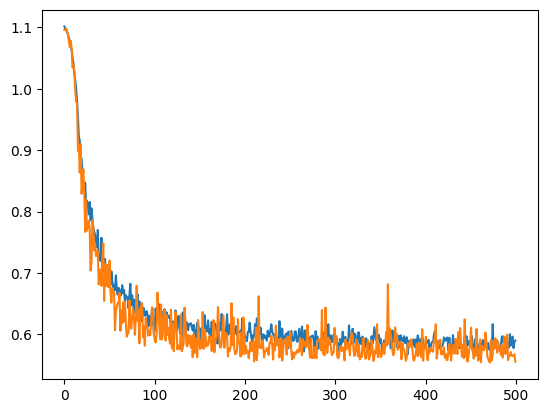

In [118]:
plt.plot(np.array(TRAIN_LOSS), label = 'train_loss')
plt.plot(np.array(VAL_LOSS), label = 'val_loss')
plt.show()

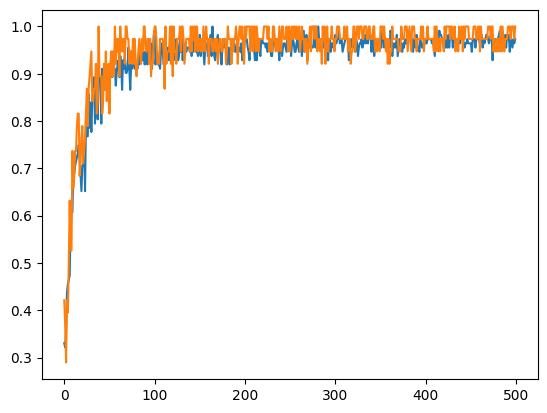

In [119]:
plt.plot(np.array(TRAIN_ACC), label = 'train_accuracy')
plt.plot(np.array(VAL_ACC), label = 'val_accuracy')
plt.show()